In [1]:
import pandas as pd
from sklearn import preprocessing as pp
from sklearn import impute as ip
import numpy as np
import matplotlib.pyplot as plt

df_cwl = pd.read_csv("./country_wise_latest.csv")
df_ccc = pd.read_csv("./covid_19_clean_complete.csv")
df_dw = pd.read_csv("./day_wise.csv")
df_fg = pd.read_csv("./full_grouped.csv")
df_ucw = pd.read_csv("./usa_county_wise.csv")
df_wd = pd.read_csv("./worldometer_data.csv")
df_dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')


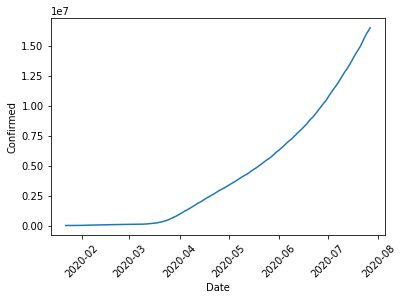

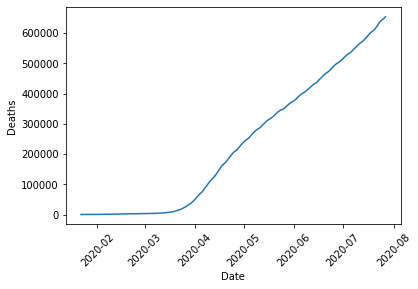

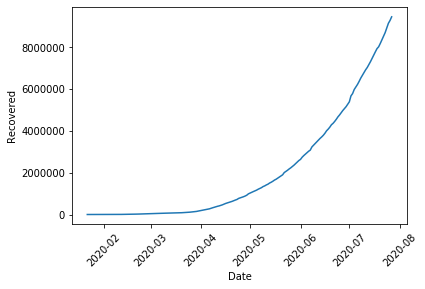

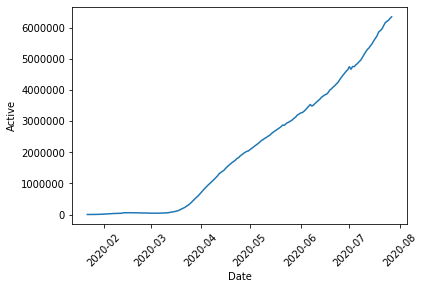

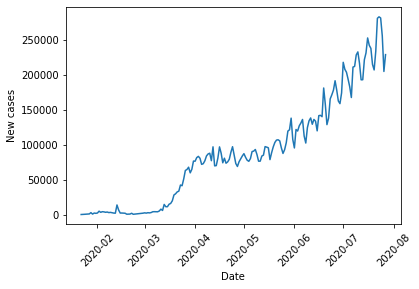

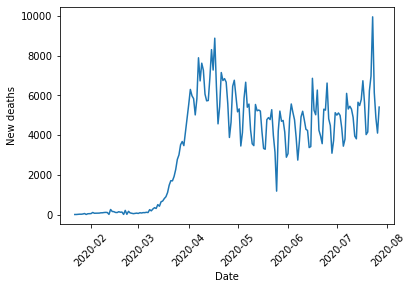

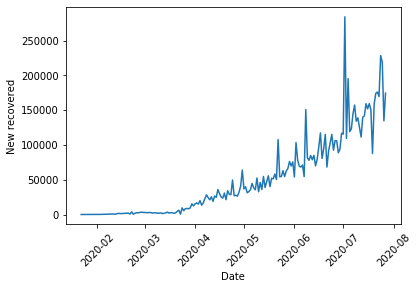

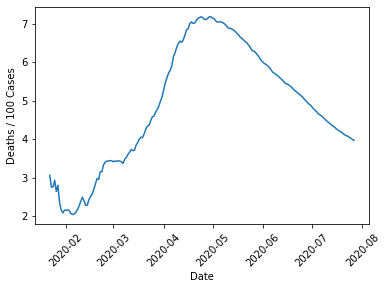

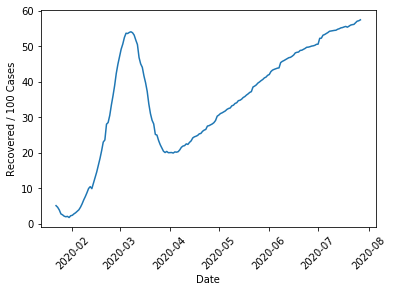

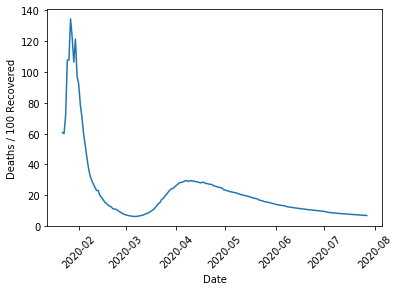

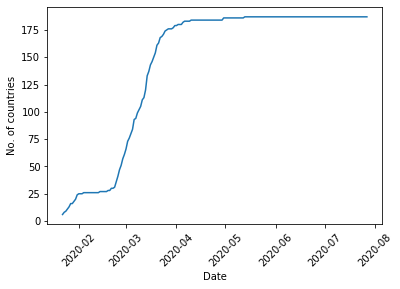

In [2]:
#day_wise折線圖
names = df_dw.columns
print(names)
df_dw['Date'] = pd.to_datetime(df_dw['Date'])
x = df_dw["Date"]
for i in names:
  if i!= 'Date':
    y = df_dw[i]
    plt.plot(x, y)
    plt.xlabel("Date")
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.show()

In [3]:
df_wd

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [4]:
df_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [5]:
df_wd = df_wd[
    ['Country/Region', 'Continent', 'Population', 'TotalCases',
       'TotalDeaths','TotalRecovered',
       'ActiveCases', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region']
       ]
df_wd = df_wd.dropna()
df_wd['Cases/1M pop'] = df_wd['TotalCases']/df_wd['Population']*1000000
df_wd['Recovered/1M pop'] = df_wd['TotalRecovered']/df_wd['Population']*1000000
df_wd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 195
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    153 non-null    object 
 1   Continent         153 non-null    object 
 2   Population        153 non-null    float64
 3   TotalCases        153 non-null    int64  
 4   TotalDeaths       153 non-null    float64
 5   TotalRecovered    153 non-null    float64
 6   ActiveCases       153 non-null    float64
 7   Tot Cases/1M pop  153 non-null    float64
 8   Deaths/1M pop     153 non-null    float64
 9   TotalTests        153 non-null    float64
 10  Tests/1M pop      153 non-null    float64
 11  WHO Region        153 non-null    object 
 12  Cases/1M pop      153 non-null    float64
 13  Recovered/1M pop  153 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 17.9+ KB


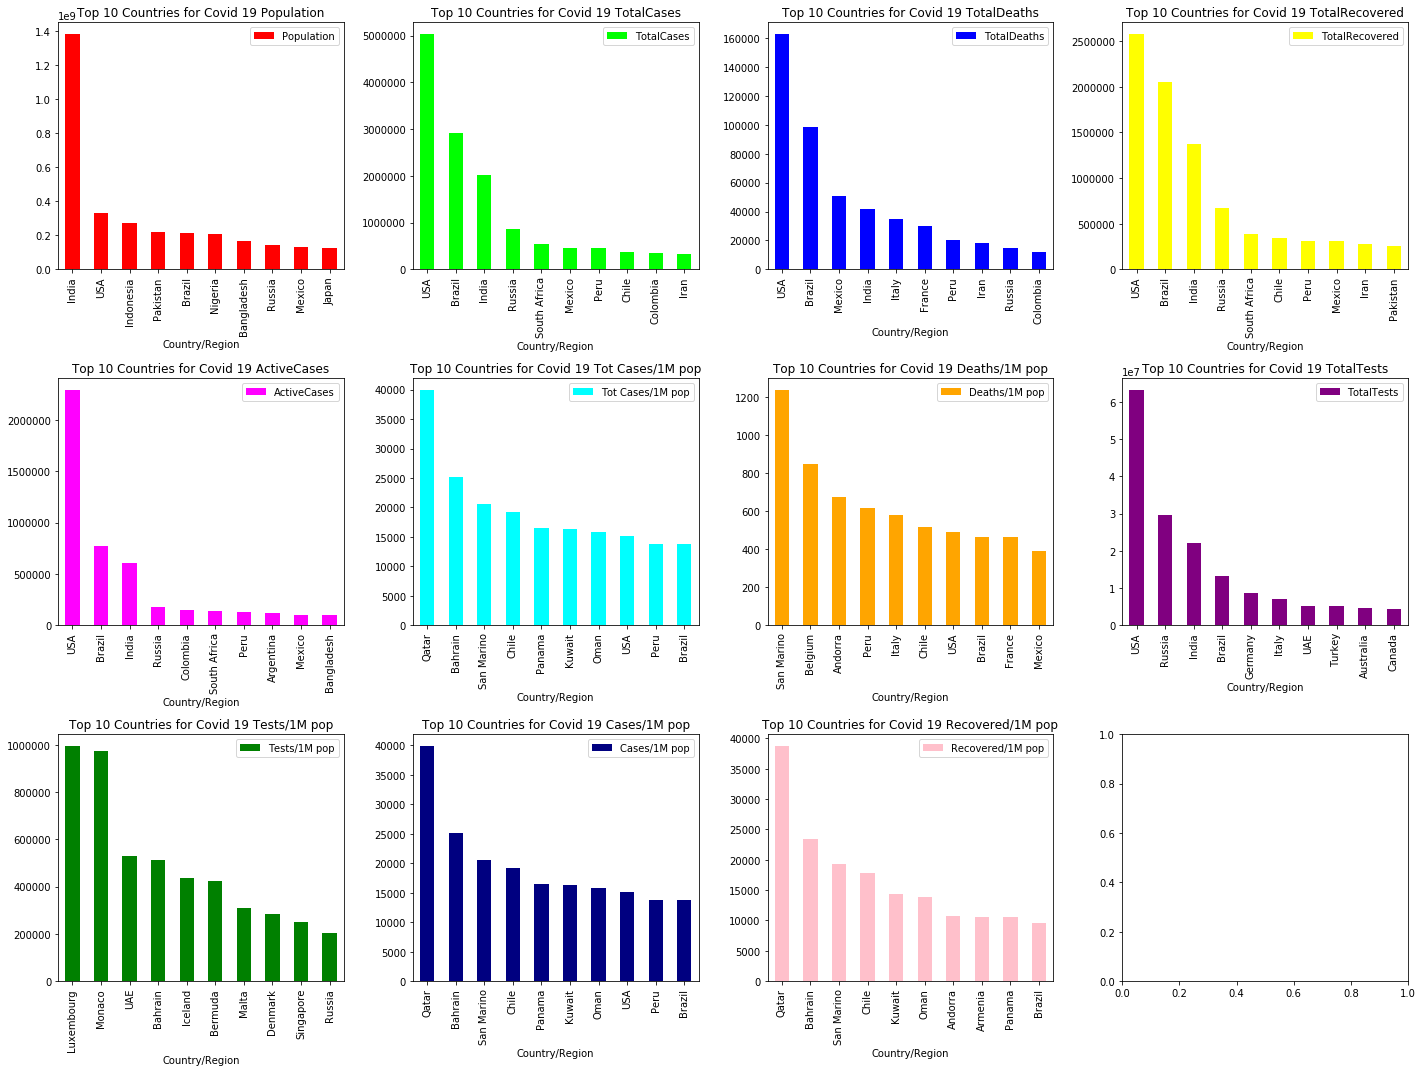

In [6]:
import matplotlib.pyplot as plt

x = ['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Tot Cases/1M pop',
     'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'Cases/1M pop', 'Recovered/1M pop']

colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#FFA500', '#800080', '#008000', '#000080', '#FFC0CB']

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

for i, feature in enumerate(x):
    row = i // 4
    col = i % 4

    ph = df_wd[['Country/Region', feature]].sort_values(by=feature, ascending=False, ignore_index=True).head(10)
    ph = ph.set_index('Country/Region')

    if len(ph) > 0:
        ax = axs[row, col]
        ph.plot(kind='bar', color=colors[i], ax=ax, title='Top 10 Countries for Covid 19 ' + feature)

    if i == len(x) - 1:
        break

plt.tight_layout()
plt.show()

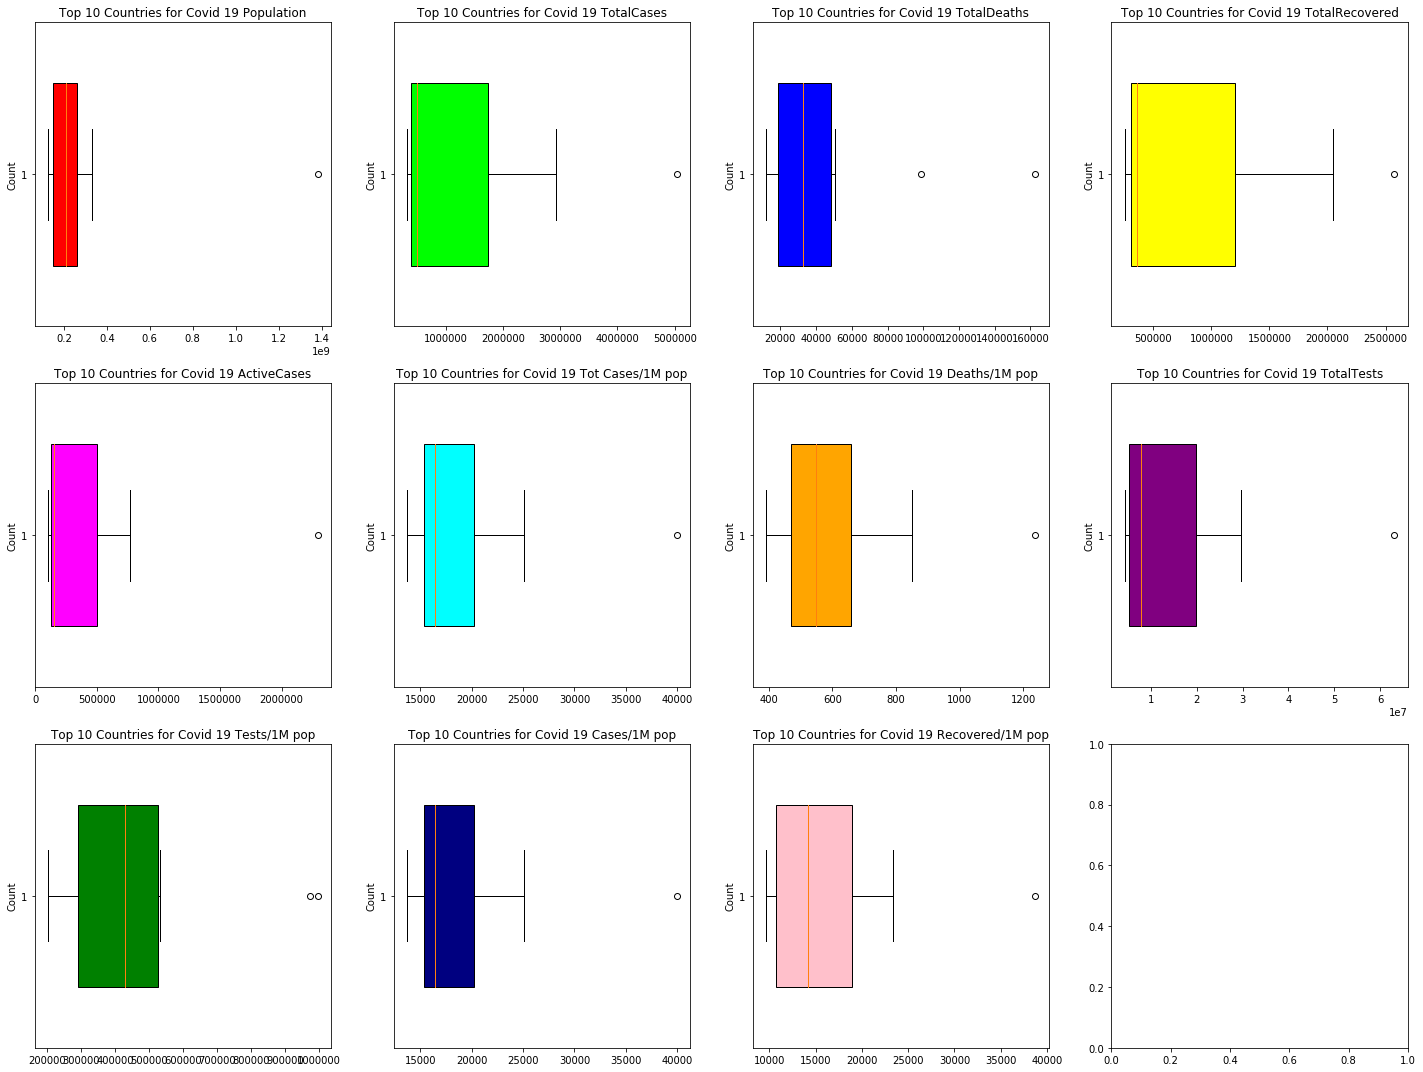

In [7]:
import matplotlib.pyplot as plt

x = ['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Tot Cases/1M pop',
     'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'Cases/1M pop', 'Recovered/1M pop']

colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#FFA500', '#800080', '#008000', '#000080', '#FFC0CB']

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

for i, feature in enumerate(x):
    row = i // 4
    col = i % 4

    ph = df_wd[['Country/Region', feature]].sort_values(by=feature, ascending=False, ignore_index=True).head(10)
    ph = ph.set_index('Country/Region')

    if len(ph) > 0:
        ax = axs[row, col]
        ax.boxplot(ph[feature], vert=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[i]))
        ax.set_ylabel('Count')
        ax.set_title('Top 10 Countries for Covid 19 ' + feature)

    if i == len(x) - 1:
        break

plt.tight_layout()
plt.show()

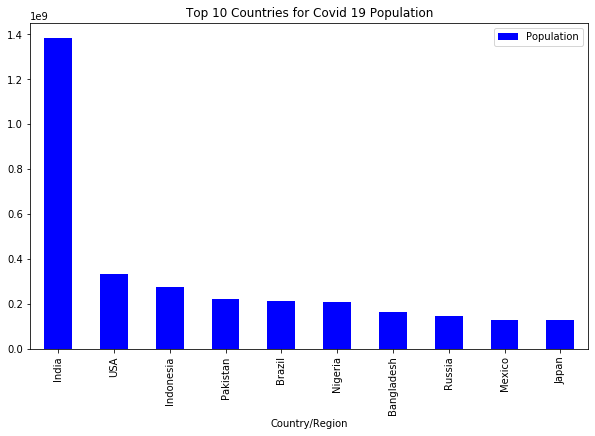

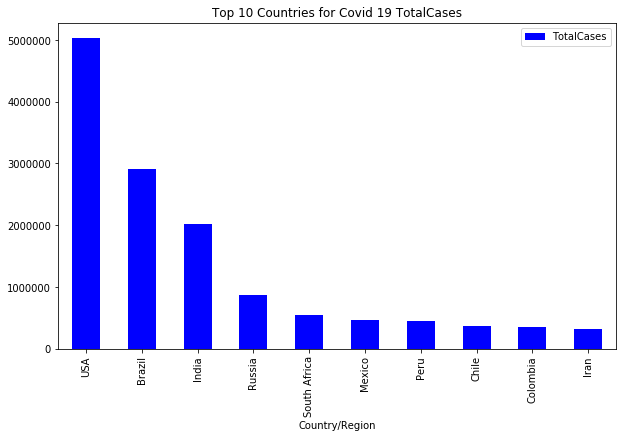

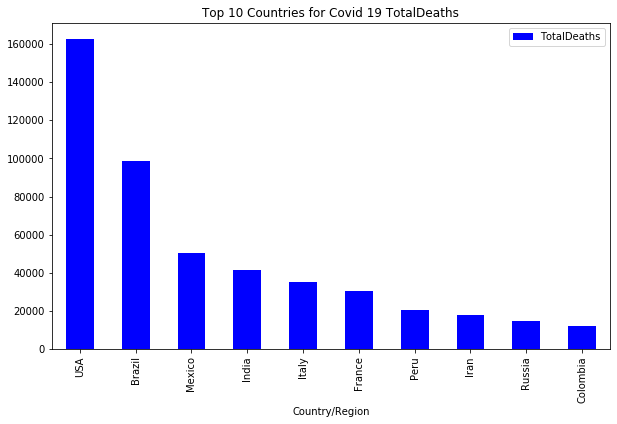

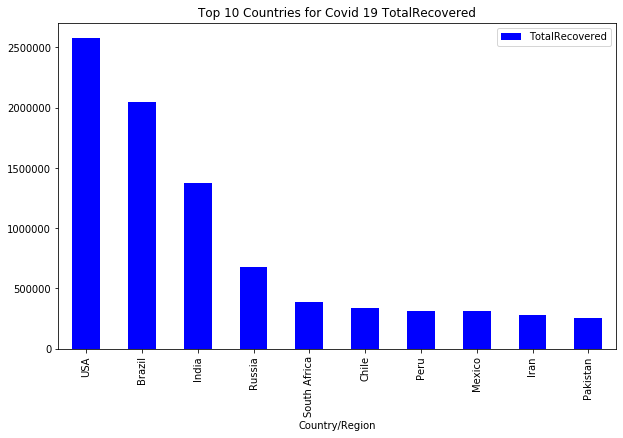

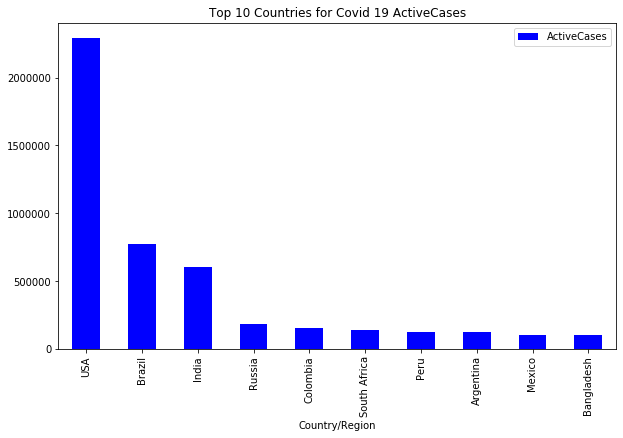

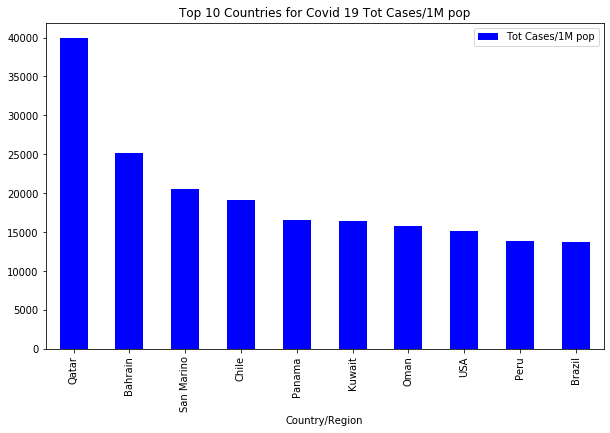

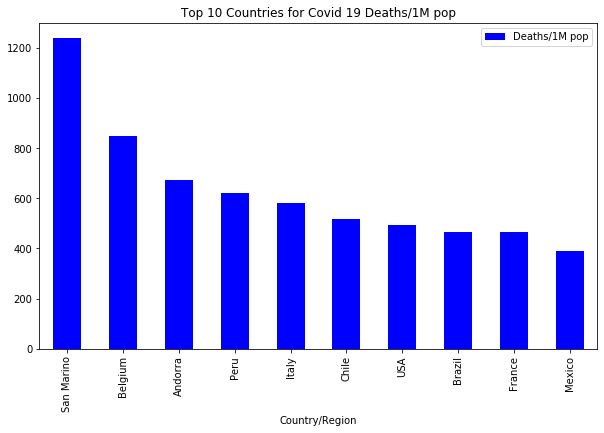

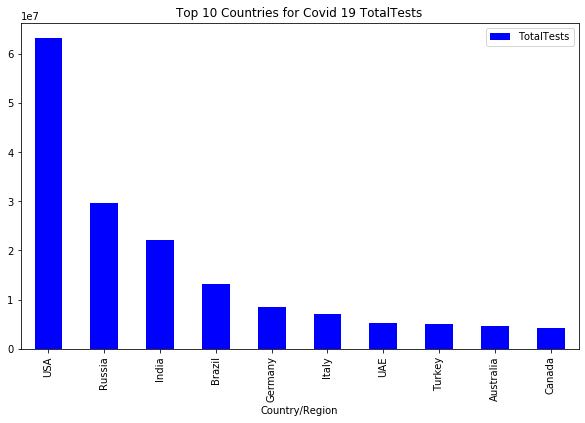

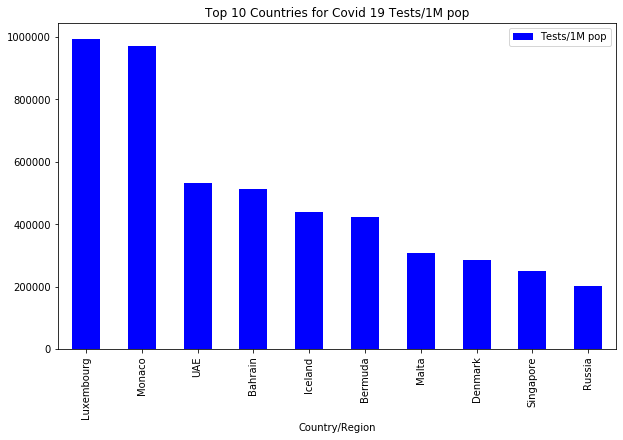

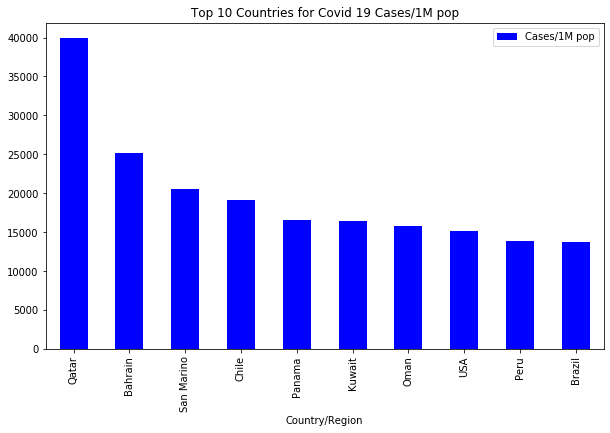

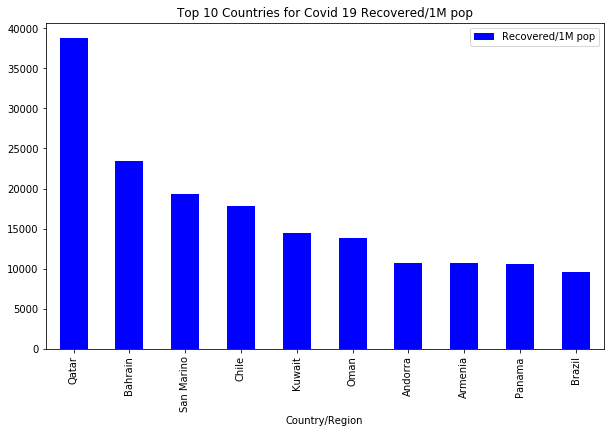

In [8]:
x=[ 'Population', 'TotalCases',
       'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Tot Cases/1M pop',
       'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'Cases/1M pop', 'Recovered/1M pop']
for i in x:
  ph = df_wd[['Country/Region',i]].sort_values(by = i,ascending=False,ignore_index = True).head(10)
  ph = ph.set_index('Country/Region')
  ph
  ph.plot(kind='bar',color='blue',figsize=(10,6),title='Top 10 Countries for Covid 19 '+i)
  plt.show()

In [9]:
df_wd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 195
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    153 non-null    object 
 1   Continent         153 non-null    object 
 2   Population        153 non-null    float64
 3   TotalCases        153 non-null    int64  
 4   TotalDeaths       153 non-null    float64
 5   TotalRecovered    153 non-null    float64
 6   ActiveCases       153 non-null    float64
 7   Tot Cases/1M pop  153 non-null    float64
 8   Deaths/1M pop     153 non-null    float64
 9   TotalTests        153 non-null    float64
 10  Tests/1M pop      153 non-null    float64
 11  WHO Region        153 non-null    object 
 12  Cases/1M pop      153 non-null    float64
 13  Recovered/1M pop  153 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 17.9+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_wd['Continent'] = le.fit_transform(df_wd['Continent'])
df_wd['WHO Region'] = le.fit_transform(df_wd['WHO Region'])
df_wd.drop(columns=['Country/Region'], inplace=True)
df_wd.reset_index(drop=True, inplace=True)
df_wd

,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Cases/1M pop,Recovered/1M pop
0,4,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,15194.0,492.0,63139605.0,190640.0,1,15193.862961,7779.838612
1,5,2.127107e+08,2917562,98644.0,2047660.0,771258.0,13716.0,464.0,13206188.0,62085.0,1,13716.104125,9626.502461
2,1,1.381345e+09,2025409,41638.0,1377384.0,606387.0,1466.0,30.0,22149351.0,16035.0,4,1466.258613,997.132507
3,3,1.459409e+08,871894,14606.0,676357.0,180931.0,5974.0,100.0,29716907.0,203623.0,3,5974.294092,4634.457433
4,0,5.938157e+07,538184,9604.0,387316.0,141264.0,9063.0,162.0,3149807.0,53044.0,0,9063.149328,6522.495550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,3,3.927000e+04,125,4.0,105.0,16.0,3183.0,102.0,38209.0,972982.0,3,3183.091418,2673.796791
149,4,9.801000e+04,92,3.0,76.0,13.0,939.0,31.0,1500.0,15305.0,1,938.679727,775.431078
150,3,3.813900e+04,89,1.0,85.0,3.0,2334.0,26.0,900.0,23598.0,3,2333.569312,2228.689793
151,4,3.983120e+05,86,2.0,31.0,53.0,216.0,5.0,3679.0,9236.0,1,215.911145,77.828436


In [11]:
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale = scaler.fit_transform(df_wd.drop(columns=['Continent','WHO Region']))
df_scale = pd.DataFrame(scale, columns=df_wd.drop(columns=['Continent','WHO Region']).columns)
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Population        153 non-null    float64
 1   TotalCases        153 non-null    float64
 2   TotalDeaths       153 non-null    float64
 3   TotalRecovered    153 non-null    float64
 4   ActiveCases       153 non-null    float64
 5   Tot Cases/1M pop  153 non-null    float64
 6   Deaths/1M pop     153 non-null    float64
 7   TotalTests        153 non-null    float64
 8   Tests/1M pop      153 non-null    float64
 9   Cases/1M pop      153 non-null    float64
 10  Recovered/1M pop  153 non-null    float64
dtypes: float64(11)
memory usage: 13.3 KB


In [12]:
df_wd[['Continent','WHO Region']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Continent   153 non-null    int64
 1   WHO Region  153 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB


In [13]:
df_merged = pd.concat([df_scale, df_wd[['Continent','WHO Region']]], axis=1)
df_merged

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Cases/1M pop,Recovered/1M pop,Continent,WHO Region
0,2.433275,9.823385,9.583041,8.501905,11.233559,2.173839,2.326758,10.270551,0.828727,2.173809,1.076617,4,1
1,1.449356,5.595033,5.709434,6.701580,3.656919,1.898833,2.162989,1.940577,-0.098258,1.898847,1.463832,5,1
2,11.153683,3.811100,2.267744,4.420491,2.835881,-0.380485,-0.375438,3.432490,-0.430316,-0.380440,-0.345604,1,4
3,0.894901,1.504551,0.635709,2.034750,0.717159,0.458304,0.033986,4.694922,0.922345,0.458355,0.417082,3,3
4,0.176113,0.837270,0.333718,1.051083,0.519622,1.033064,0.396618,0.262955,-0.163451,1.033087,0.812973,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,-0.316665,-0.238624,-0.245874,-0.266677,-0.183776,-0.061008,0.045683,-0.256126,6.470046,-0.060995,0.005964,3,3
149,-0.316177,-0.238690,-0.245935,-0.266775,-0.183791,-0.478542,-0.369589,-0.262250,-0.435580,-0.478605,-0.392092,4,1
150,-0.316674,-0.238696,-0.246056,-0.266745,-0.183841,-0.218979,-0.398834,-0.262350,-0.375781,-0.219063,-0.087367,3,3
151,-0.313684,-0.238702,-0.245995,-0.266929,-0.183592,-0.613068,-0.521661,-0.261887,-0.479343,-0.613088,-0.538367,4,1


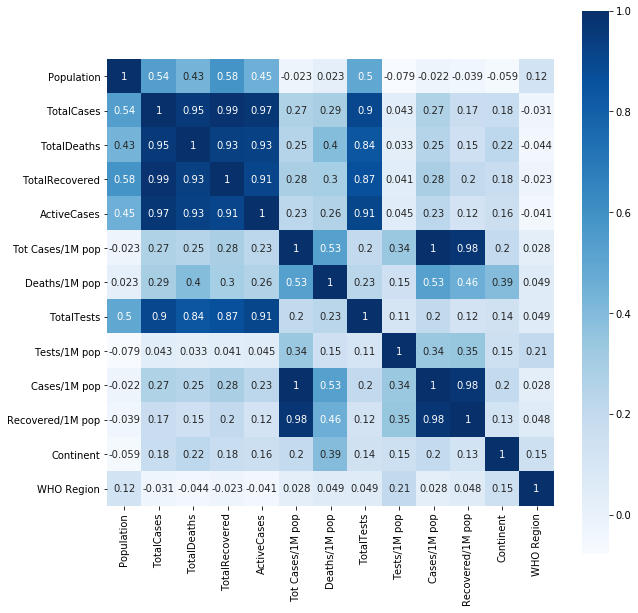

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df =df_merged.corr() #計算相關係數
plt.subplots(figsize=(10, 10))  # 設置長寬尺寸大小
sns.heatmap(df, annot=True, vmax=1, square=True, cmap="Blues")
#1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示4.變成正方形5.要什麼顏色
plt.show()

In [15]:
df_merged.columns

Index(['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered',
       'ActiveCases', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'Cases/1M pop', 'Recovered/1M pop', 'Continent',
       'WHO Region'],
      dtype='object')

In [16]:
#特徵選取
from sklearn import feature_selection as fs
f = ['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered',
       'ActiveCases', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'Cases/1M pop', 'Recovered/1M pop', 'Continent',
       'WHO Region']

skb = fs.SelectKBest(fs.f_classif,k=4)
for i in f:
  df = df_merged.drop(columns=[i])
  skb.fit(df,df_merged[i])
  s = skb.fit_transform(df,df_merged[i])
  fss = skb.get_support()
  selected_features = df.columns[fss]
  print(i,selected_features)
  #print(skb.pvalues_)
  #print(s[:5])

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/ec2-user/anaconda3/lib/python3.7/site-p

Population Index(['Cases/1M pop', 'Recovered/1M pop', 'Continent', 'WHO Region'], dtype='object')
TotalCases Index(['Cases/1M pop', 'Recovered/1M pop', 'Continent', 'WHO Region'], dtype='object')
TotalDeaths Index(['TotalCases', 'TotalRecovered', 'ActiveCases', 'TotalTests'], dtype='object')
TotalRecovered Index(['TotalCases', 'TotalDeaths', 'ActiveCases', 'TotalTests'], dtype='object')
ActiveCases Index(['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered'], dtype='object')
Tot Cases/1M pop Index(['Tests/1M pop', 'Cases/1M pop', 'Continent', 'WHO Region'], dtype='object')
Deaths/1M pop Index(['TotalDeaths', 'ActiveCases', 'TotalTests', 'Tests/1M pop'], dtype='object')
TotalTests Index(['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases'], dtype='object')
Tests/1M pop Index(['Cases/1M pop', 'Recovered/1M pop', 'Continent', 'WHO Region'], dtype='object')
Cases/1M pop Index(['Tests/1M pop', 'Recovered/1M pop', 'Continent', 'WHO Region'], dtype='object')
Recovered/1M pop I

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [17]:
from sklearn import ensemble as es
rfc = es.RandomForestClassifier(n_estimators=1000)
rfc.fit(df_merged,df_merged['WHO Region'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
from sklearn import model_selection, tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from subprocess import call
import numpy as np

# Continent, WHO Region

In [19]:
from sklearn.decomposition import PCA
X = df_merged.drop(columns=['Continent','WHO Region'])
y1=df_merged['Continent']
y2=df_merged['WHO Region']
pca=PCA(n_components=8)
newX=pca.fit_transform(X)
fn=['TotalCases', 'Recovered/1M pop', 'Tests/1M pop', 'Population',
       'Deaths/1M pop', 'TotalTests', 'ActiveCases', 'TotalDeaths']

selected_features_idx = np.abs(pca.components_).argsort()[:, ::-1][:, :1]
selected_features = X.columns[selected_features_idx.flatten()]
print(selected_features)

Index(['TotalCases', 'Recovered/1M pop', 'Tests/1M pop', 'Population',
       'Deaths/1M pop', 'TotalTests', 'ActiveCases', 'TotalDeaths'],
      dtype='object')


In [20]:
x_train,x_test,y_train,y_test = train_test_split(newX,y1,test_size=0.4,random_state=0)
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=dtc.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=dtc.predict(x_test))

export_graphviz(dtc, out_file='tree.dot',
        feature_names=fn,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.36      0.33      0.34        15
           2       0.00      0.00      0.00         2
           3       0.38      0.55      0.44        11
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         6

    accuracy                           0.32        62
   macro avg       0.22      0.23      0.22        62
weighted avg       0.32      0.32      0.32        62



0

In [21]:
x_train,x_test,y_train,y_test = train_test_split(newX,y2,test_size=0.4,random_state=0)
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=dtc.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=dtc.predict(x_test))

export_graphviz(dtc, out_file='tree1.dot',
        feature_names=fn,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

              precision    recall  f1-score   support

           0       0.44      0.50      0.47        14
           1       0.44      0.25      0.32        16
           2       0.29      0.18      0.22        11
           3       0.50      0.62      0.55        13
           4       0.12      0.50      0.20         2
           5       0.00      0.00      0.00         6

    accuracy                           0.35        62
   macro avg       0.30      0.34      0.29        62
weighted avg       0.37      0.35      0.35        62



0

In [22]:

from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test = train_test_split(newX,y1,test_size=0.4,random_state=0)
#print(x_train.shape)

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_gnb_score = gnb.predict_proba(x_test)
gnb.score(x_test,y_test)

print(metrics.classification_report(y_true=y_test,y_pred=gnb.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=gnb.predict(x_test))
'''
export_graphviz(gnb, out_file='tree.dot',
        feature_names=fn,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])'''

              precision    recall  f1-score   support

           0       0.39      0.83      0.54        18
           1       0.29      0.13      0.18        15
           2       0.00      0.00      0.00         2
           3       0.29      0.18      0.22        11
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         6

    accuracy                           0.31        62
   macro avg       0.16      0.19      0.16        62
weighted avg       0.23      0.31      0.24        62



/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


"\nexport_graphviz(gnb, out_file='tree.dot',\n        feature_names=fn,\n        rounded = True, proportion = False,\n        precision = 2, filled = True)\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])"

In [23]:
x_train,x_test,y_train,y_test = train_test_split(newX,y2,test_size=0.4,random_state=0)
#print(x_train.shape)

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_gnb_score = gnb.predict_proba(x_test)
gnb.score(x_test,y_test)

print(metrics.classification_report(y_true=y_test,y_pred=gnb.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=gnb.predict(x_test))

              precision    recall  f1-score   support

           0       0.22      0.43      0.29        14
           1       0.14      0.06      0.09        16
           2       0.00      0.00      0.00        11
           3       0.43      0.23      0.30        13
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6

    accuracy                           0.16        62
   macro avg       0.13      0.12      0.11        62
weighted avg       0.18      0.16      0.15        62



array([[6, 0, 0, 0, 1, 7],
       [9, 1, 0, 2, 1, 3],
       [3, 4, 0, 1, 1, 2],
       [7, 1, 2, 3, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [2, 0, 1, 1, 2, 0]])

In [24]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(newX,y1,test_size=0.4,random_state=0)
clf = RandomForestClassifier(n_estimators=20,max_depth=4)
clf.fit(x_train,y_train)
y_clf_score = clf.predict_proba(x_test)
clf.score(x_test,y_test)

print(metrics.classification_report(y_true=y_test,y_pred=clf.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=clf.predict(x_test))
'''
export_graphviz(clf, out_file='tree2.dot',
        feature_names=fn,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=600'])'''

              precision    recall  f1-score   support

           0       0.48      0.72      0.58        18
           1       0.47      0.53      0.50        15
           2       0.00      0.00      0.00         2
           3       0.47      0.73      0.57        11
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         6

    accuracy                           0.47        62
   macro avg       0.24      0.33      0.27        62
weighted avg       0.34      0.47      0.39        62



/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


"\nexport_graphviz(clf, out_file='tree2.dot',\n        feature_names=fn,\n        rounded = True, proportion = False,\n        precision = 2, filled = True)\ncall(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=600'])"

In [25]:
x_train,x_test,y_train,y_test = train_test_split(newX,y2,test_size=0.4,random_state=0)
clf = RandomForestClassifier(n_estimators=20,max_depth=4)
clf.fit(x_train,y_train)
y_clf_score = clf.predict_proba(x_test)
clf.score(x_test,y_test)

print(metrics.classification_report(y_true=y_test,y_pred=clf.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=clf.predict(x_test))
'''
export_graphviz(clf, out_file='tree3.dot',
        feature_names=fn,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree3.dot', '-o', 'tree3.png', '-Gdpi=600'])'''

              precision    recall  f1-score   support

           0       0.46      0.79      0.58        14
           1       0.50      0.12      0.20        16
           2       0.67      0.18      0.29        11
           3       0.48      0.92      0.63        13
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6

    accuracy                           0.44        62
   macro avg       0.35      0.34      0.28        62
weighted avg       0.45      0.44      0.37        62



/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


"\nexport_graphviz(clf, out_file='tree3.dot',\n        feature_names=fn,\n        rounded = True, proportion = False,\n        precision = 2, filled = True)\ncall(['dot', '-Tpng', 'tree3.dot', '-o', 'tree3.png', '-Gdpi=600'])"

# Recovered/1M pop

In [26]:
df_1 = df_merged.copy()

In [27]:
lowest = df_1['Recovered/1M pop'].min()-1
bins1=[lowest, df_1['Recovered/1M pop'].quantile(1/3), df_1['Recovered/1M pop'].quantile(2/3), df_1['Recovered/1M pop'].max()]
labels = [0, 1, 2]

df_1['Recovered/1M pop'] = pd.cut(df_1['Recovered/1M pop'], bins=bins1, labels=labels)

print(df_1)

     Population  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  \
0      2.433275    9.823385     9.583041        8.501905    11.233559   
1      1.449356    5.595033     5.709434        6.701580     3.656919   
2     11.153683    3.811100     2.267744        4.420491     2.835881   
3      0.894901    1.504551     0.635709        2.034750     0.717159   
4      0.176113    0.837270     0.333718        1.051083     0.519622   
..          ...         ...          ...             ...          ...   
148   -0.316665   -0.238624    -0.245874       -0.266677    -0.183776   
149   -0.316177   -0.238690    -0.245935       -0.266775    -0.183791   
150   -0.316674   -0.238696    -0.246056       -0.266745    -0.183841   
151   -0.313684   -0.238702    -0.245995       -0.266929    -0.183592   
152   -0.309542   -0.238820    -0.246056       -0.266973    -0.183816   

     Tot Cases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop  Cases/1M pop  \
0            2.173839       2.326758   10.2

In [28]:
from sklearn.decomposition import PCA
X = df_1.drop(columns=['Recovered/1M pop','Continent','WHO Region'])
y=df_1['Recovered/1M pop']
pca=PCA(n_components=6)
newX=pca.fit_transform(X)


selected_features_idx = np.abs(pca.components_).argsort()[:, ::-1][:, :1]
selected_features = X.columns[selected_features_idx.flatten()]
print(selected_features)

Index(['TotalCases', 'Tot Cases/1M pop', 'Tests/1M pop', 'Population',
       'Deaths/1M pop', 'TotalTests'],
      dtype='object')


In [29]:
#DecisionTree
fn=['TotalCases', 'Tot Cases/1M pop', 'Tests/1M pop', 'Population',
       'Deaths/1M pop', 'TotalTests']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=dtc.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=dtc.predict(x_test))

export_graphviz(dtc, out_file='tree2.dot',
        feature_names=X.columns,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=600'])

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.75      0.71      0.73        17
           2       0.78      0.95      0.86        19

    accuracy                           0.84        62
   macro avg       0.83      0.83      0.83        62
weighted avg       0.85      0.84      0.84        62



0

In [30]:
#GNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
#print(x_train.shape)

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_gnb_score = gnb.predict_proba(x_test)
gnb.score(x_test,y_test)

print(metrics.classification_report(y_true=y_test,y_pred=gnb.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=gnb.predict(x_test))
'''
export_graphviz(gnb, out_file='tree.dot',
        feature_names=df.columns,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])'''

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.60      0.71      0.65        17
           2       0.93      0.68      0.79        19

    accuracy                           0.79        62
   macro avg       0.80      0.77      0.78        62
weighted avg       0.81      0.79      0.79        62



"\nexport_graphviz(gnb, out_file='tree.dot',\n        feature_names=df.columns,\n        rounded = True, proportion = False,\n        precision = 2, filled = True)\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])"

In [31]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
clf = RandomForestClassifier(n_estimators=20,max_depth=4)
clf.fit(x_train,y_train)
y_clf_score = clf.predict_proba(x_test)
clf.score(x_test,y_test)

print(metrics.classification_report(y_true=y_test,y_pred=clf.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=clf.predict(x_test))
'''
export_graphviz(dtc, out_file='tree.dot',
        feature_names=df.columns,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])'''

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        26
           1       0.67      0.94      0.78        17
           2       0.94      0.84      0.89        19

    accuracy                           0.85        62
   macro avg       0.87      0.86      0.85        62
weighted avg       0.89      0.85      0.86        62



"\nexport_graphviz(dtc, out_file='tree.dot',\n        feature_names=df.columns,\n        rounded = True, proportion = False,\n        precision = 2, filled = True)\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])"

# **Deaths/1M pop**

In [32]:
df_2 = df_merged.copy()

In [33]:
lowest = df_2['Deaths/1M pop'].min()-1
bins1=[lowest, df_2['Deaths/1M pop'].quantile(1/3), df_2['Deaths/1M pop'].quantile(2/3), df_2['Deaths/1M pop'].max()]
labels = [0, 1, 2]

df_2['Deaths/1M pop'] = pd.cut(df_2['Deaths/1M pop'], bins=bins1, labels=labels)

print(df_2)

     Population  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  \
0      2.433275    9.823385     9.583041        8.501905    11.233559   
1      1.449356    5.595033     5.709434        6.701580     3.656919   
2     11.153683    3.811100     2.267744        4.420491     2.835881   
3      0.894901    1.504551     0.635709        2.034750     0.717159   
4      0.176113    0.837270     0.333718        1.051083     0.519622   
..          ...         ...          ...             ...          ...   
148   -0.316665   -0.238624    -0.245874       -0.266677    -0.183776   
149   -0.316177   -0.238690    -0.245935       -0.266775    -0.183791   
150   -0.316674   -0.238696    -0.246056       -0.266745    -0.183841   
151   -0.313684   -0.238702    -0.245995       -0.266929    -0.183592   
152   -0.309542   -0.238820    -0.246056       -0.266973    -0.183816   

     Tot Cases/1M pop Deaths/1M pop  TotalTests  Tests/1M pop  Cases/1M pop  \
0            2.173839             2   10.270

In [34]:
from sklearn.decomposition import PCA
X = df_2.drop(columns=['Deaths/1M pop','Continent','WHO Region'])
y=df_2['Deaths/1M pop']
pca=PCA(n_components=6)
newX=pca.fit_transform(X)


selected_features_idx = np.abs(pca.components_).argsort()[:, ::-1][:, :1]
selected_features = X.columns[selected_features_idx.flatten()]
print(selected_features)

Index(['TotalCases', 'Recovered/1M pop', 'Tests/1M pop', 'Population',
       'TotalTests', 'ActiveCases'],
      dtype='object')


In [35]:
#DecisionTree
fn=['TotalCases', 'Recovered/1M pop', 'Tests/1M pop', 'Population',
       'TotalTests', 'ActiveCases']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=dtc.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=dtc.predict(x_test))

export_graphviz(dtc, out_file='tree3.dot',
        feature_names=X.columns,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree3.dot', '-o', 'tree3.png', '-Gdpi=600'])

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.48      0.65      0.55        17
           2       0.93      0.70      0.80        20

    accuracy                           0.71        62
   macro avg       0.73      0.70      0.71        62
weighted avg       0.75      0.71      0.72        62



0

In [36]:
#GNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
#print(x_train.shape)

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_gnb_score = gnb.predict_proba(x_test)
gnb.score(x_test,y_test)

print(metrics.classification_report(y_true=y_test,y_pred=gnb.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=gnb.predict(x_test))
'''
export_graphviz(gnb, out_file='tree.dot',
        feature_names=df.columns,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])'''

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        25
           1       0.40      0.47      0.43        17
           2       0.92      0.55      0.69        20

    accuracy                           0.66        62
   macro avg       0.68      0.63      0.64        62
weighted avg       0.70      0.66      0.66        62



"\nexport_graphviz(gnb, out_file='tree.dot',\n        feature_names=df.columns,\n        rounded = True, proportion = False,\n        precision = 2, filled = True)\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])"

In [37]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
clf = RandomForestClassifier(n_estimators=20,max_depth=4)
clf.fit(x_train,y_train)
y_clf_score = clf.predict_proba(x_test)
clf.score(x_test,y_test)

print(metrics.classification_report(y_true=y_test,y_pred=clf.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=clf.predict(x_test))
'''
export_graphviz(dtc, out_file='tree.dot',
        feature_names=df.columns,
        rounded = True, proportion = False,
        precision = 2, filled = True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])'''

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        25
           1       0.47      0.47      0.47        17
           2       0.82      0.70      0.76        20

    accuracy                           0.71        62
   macro avg       0.69      0.68      0.69        62
weighted avg       0.71      0.71      0.71        62



"\nexport_graphviz(dtc, out_file='tree.dot',\n        feature_names=df.columns,\n        rounded = True, proportion = False,\n        precision = 2, filled = True)\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])"

# KMeans

In [38]:
df_3 = df_merged.copy()
df_3 = df_3.drop(columns=['Continent','WHO Region'])
df_3

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Cases/1M pop,Recovered/1M pop
0,2.433275,9.823385,9.583041,8.501905,11.233559,2.173839,2.326758,10.270551,0.828727,2.173809,1.076617
1,1.449356,5.595033,5.709434,6.701580,3.656919,1.898833,2.162989,1.940577,-0.098258,1.898847,1.463832
2,11.153683,3.811100,2.267744,4.420491,2.835881,-0.380485,-0.375438,3.432490,-0.430316,-0.380440,-0.345604
3,0.894901,1.504551,0.635709,2.034750,0.717159,0.458304,0.033986,4.694922,0.922345,0.458355,0.417082
4,0.176113,0.837270,0.333718,1.051083,0.519622,1.033064,0.396618,0.262955,-0.163451,1.033087,0.812973
...,...,...,...,...,...,...,...,...,...,...,...
148,-0.316665,-0.238624,-0.245874,-0.266677,-0.183776,-0.061008,0.045683,-0.256126,6.470046,-0.060995,0.005964
149,-0.316177,-0.238690,-0.245935,-0.266775,-0.183791,-0.478542,-0.369589,-0.262250,-0.435580,-0.478605,-0.392092
150,-0.316674,-0.238696,-0.246056,-0.266745,-0.183841,-0.218979,-0.398834,-0.262350,-0.375781,-0.219063,-0.087367
151,-0.313684,-0.238702,-0.245995,-0.266929,-0.183592,-0.613068,-0.521661,-0.261887,-0.479343,-0.613088,-0.538367


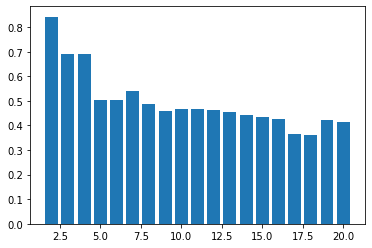

[0.8421077642125777, 0.68918091438859, 0.6887896518540247, 0.5039499534492022, 0.5029095581769226, 0.5391738736686316, 0.48744330831249605, 0.45818196780015646, 0.46544582961770276, 0.46853157352204566, 0.46386918314196, 0.4552657412681309, 0.44307572053732397, 0.4323983388777225, 0.4275544766239584, 0.36409818527792276, 0.3603943675696813, 0.42213062494736153, 0.41571017221223416]


In [39]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

sil_avg = []
ks = range(2,21)
for k in ks:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_3)
  labels = kmeans.labels_
  sil = metrics.silhouette_score(df_3,labels)
  sil_avg.append(sil)

plt.bar(ks, sil_avg)
plt.show()
print(sil_avg)

In [40]:
y = df_merged['Continent']